In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [64]:
dataset = pd.read_csv("titanic.csv")

In [65]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].dropna().median())
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].dropna().median())

dataset.loc[dataset['Sex']=='male','Sex']=0
dataset.loc[dataset['Sex']=='female','Sex']=1

dataset['Embarked']=dataset['Embarked'].fillna('S') 

dataset.loc[dataset['Embarked']=='S','Embarked']=0
dataset.loc[dataset['Embarked']=='C','Embarked']=1
dataset.loc[dataset['Embarked']=='Q','Embarked']=2

In [66]:
drop_elements = ['Name','Cabin','Ticket']
dataset = dataset.drop(drop_elements, axis=1)

In [67]:
x = dataset.drop(["Survived"],axis=1)
y = dataset["Survived"]
x=x.to_numpy()
y=y.to_numpy()



In [68]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [69]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components=None
        self.mean = None
    def fit(self,x):
        self.mean= np.mean(x,axis=0)
        x= x-self.mean
        x = np.asarray(x, dtype=float)
        cov = np.cov(x.T)
        e_vec,e_val = np.linalg.eig(cov)
        e_vec = e_vec.T
        idxs = np.argsort(e_val)[::-1]
        e_val = e_val[idxs]
        e_vec = e_vec[idxs]
        self.components= e_vec[:self.n_components]



    def transform(self,x):
        x = x-self.mean
        x = np.asarray(x, dtype=float)
        return np.dot(x,self.components.T)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7492\1018323741.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,c=y,edgecolor="none",alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))


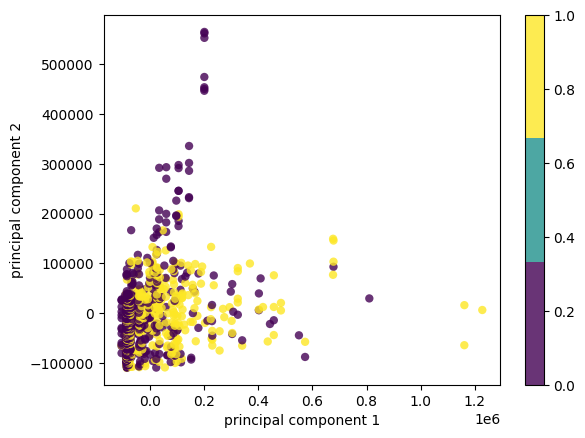

In [70]:
pca = PCA(2)
pca.fit(x)
x_projected = pca.transform(x)
x1=x_projected[:,0]
x2 = x_projected[:,1]
plt.scatter(x1,x2,c=y,edgecolor="none",alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.colorbar()
plt.show()


In [71]:
def sigmoid(x):
    x = np.asarray(x, dtype=float)
    return 1/(1+(np.exp(-x)))
class LogisticRegression():
    def __init__(self,lr=0.001,iter=1000):
        self.lr=lr
        self.iter = iter
        self.weights=None
        self.bias = None

    def fit(self,x,y):
        n_sample,n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias=0

        for _ in range(self.iter):
            predictions = np.dot(x,self.weights)+self.bias
            predictions = sigmoid(predictions)
            dw = (1/n_sample)*np.dot(x.T,(predictions-y))
            db = (1/n_sample)*np.sum((predictions-y))
            self.weights = self.weights-self.lr*dw
            self.bias = self.bias - self.lr*db
    def predict(self,x):
        pred = np.dot(x,self.weights)+self.bias
        y_pred = sigmoid(pred)
        y_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return y_pred

In [72]:
print(x.shape)
print(x_projected.shape)


(891, 8)
(891, 2)


In [73]:
size=int(x.shape[0]*0.8)
x_train=x[:size]
y_train = y[:size]
x_test = x[size:]
y_test = y[size:]

In [74]:
#Normal Logistic Regression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy(y_pred,y_test)
print("Logistic Regression: {}".format(acc))

Logistic Regression: 0.7318435754189944


In [75]:
x_train=x_projected[:size]
y_train = y[:size]
x_test = x_projected[size:]
y_test = y[size:]

In [76]:
#Logistic Regression with pca
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy(y_pred,y_test)
print("Logistic Regression with PCAs: {}".format(acc))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7492\2849177275.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+(np.exp(-x)))


Logistic Regression with PCAs: 0.7262569832402235
